This project's goal is to: build  a linear regression model and a logistic regression to predict loan decisions and amounts

**Solution Steps:**


1. Data Analysis on "loan_old.csv" dataset
2. Data Preprocessing
3. Linear Regression Model Fitting
4. Linear Regression Model Evalutaion
5. Logistic Regression Model Implementation and Fitting
6. Accuracy Evaluation Function
7. Preforming all previous steps on "loan_new.csv" dataset



**Step 1. Data Analysis on "loan_old.csv" dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('/content/loan_old.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,144.0,1.0,Urban,NaN,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y


In [72]:
# 1.i Checking for missing values
def get_missing_count(df):
  missing_count = df.isna().sum()
  return missing_count

get_missing_count(df)
# so we have some missing values in some columns ---->

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64

In [5]:
#1.ii Checking feature types (categorical or numberical)
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
Max_Loan_Amount       float64
Loan_Status            object
dtype: object

In [6]:
df.nunique()
# this shows us the numerical vs categorical features , even if the categorical features are of type int64 or float64
# we will assume that numerical values are features which have high number of unique values
# So non categorical (numerical features) are ['Income','Coapplicant_Income','Max_Loan_Amount']

Loan_ID               614
Gender                  2
Married                 2
Dependents              4
Education               2
Income                505
Coapplicant_Income    287
Loan_Tenor              9
Credit_History          2
Property_Area           3
Max_Loan_Amount       540
Loan_Status             2
dtype: int64

In [7]:
#1.iii check whether numerical features have the same scale
numerical_features = ['Income','Coapplicant_Income','Max_Loan_Amount']
numerical_columns_only = df[numerical_features]
numerical_columns_only.describe()
# so features do not have the same scale ---->

,Income,Coapplicant_Income,Max_Loan_Amount
count,614.000000,614.000000,589.000000
mean,5403.459283,1621.245798,230.499474
std,6109.041673,2926.248369,161.976967
min,150.000000,0.000000,12.830000
25%,2877.500000,0.000000,123.990000
50%,3812.500000,1188.500000,190.370000
75%,5795.000000,2297.250000,276.500000
max,81000.000000,41667.000000,990.490000


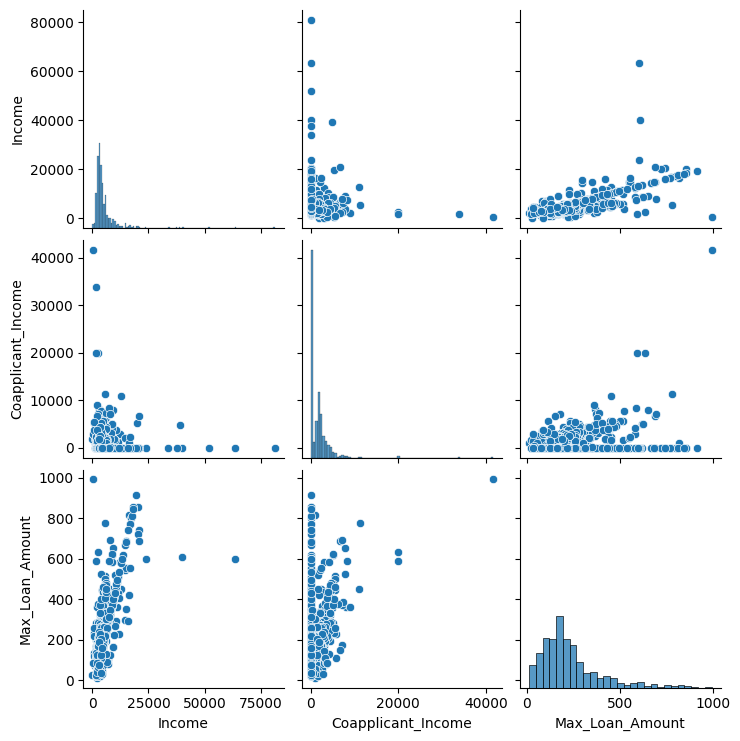

In [8]:
#1.iv visualize a pairplot between numercial columns
sns.pairplot(numerical_columns_only)
plt.show()

**Step 2. Data Preprocessing**

In [74]:
#2.i remove missing values records
def drop_missing_values(df):
  df = df.dropna()
  return df.isna().sum()
drop_missing_values(df)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Income                0
Coapplicant_Income    0
Loan_Tenor            0
Credit_History        0
Property_Area         0
Max_Loan_Amount       0
Loan_Status           0
dtype: int64

In [77]:
#2.ii separate features and targets
def seperate_features_targets(df):
  features = df.drop(['Loan_ID','Max_Loan_Amount' ,'Loan_Status'] , axis =1 )    #takes all feature columns except the last 2 and the id column //as the id is not corelated with data
  targets = df[['Max_Loan_Amount','Loan_Status']] # takes the second last column as the target feature for linear regression model (continuous value)
  return features , targets

features,targets = seperate_features_targets(df)
features.head()
targets.head()
#features.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
dtype: object

In [81]:
#2.iii Split into training and testing sets
def split_dataset(features , targets):
  from sklearn.model_selection import train_test_split
  return train_test_split(features, targets, test_size= 0.20, random_state=42) #20 of data set will be for testing
  #random_state , to achieve that same data splited for later use in logistic regression model

# from sklearn.model_selection import train_test_split
# features_Train, features_Test, targets_Train, targets_Test = train_test_split(features, targets, test_size= 0.20, random_state=42) #20 of data set will be for testing
# #random_state , to achieve that same data splited for later use in logistic regression model

features_Train, features_Test, targets_Train, targets_Test = split_dataset(features , targets)
features_Train.count() #410 rows
features_Test.count() #103 rows

Gender                479
Married               490
Dependents            480
Education             491
Income                491
Coapplicant_Income    491
Loan_Tenor            479
Credit_History        451
Property_Area         491
dtype: int64

In [92]:
#2.iv Categorical features encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#['Income','Coapplicant_Income','Max_Loan_Amount'] -> numerical , So we will encode all other columns
def encode_features(features):
  encoded_features = features
  encoded_features['Gender'] = le.fit_transform(features['Gender'])
  encoded_features['Married'] = le.fit_transform(features['Married'])
  encoded_features['Dependents'] = le.fit_transform(features['Dependents'])
  encoded_features['Education'] = le.fit_transform(features['Education'])
  encoded_features['Loan_Tenor'] = le.fit_transform(features['Loan_Tenor'])
  encoded_features['Credit_History'] = le.fit_transform(features['Credit_History'])
  encoded_features['Property_Area'] = le.fit_transform(features['Property_Area'])
  return encoded_features

# A. encoding training features
encoded_features_train = encode_features(features_Train)
encoded_features_train.head()
# B. encoding testing features

encoded_features_test = encode_features(features_Test)
encoded_features_test.head()

,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
350,1,1,0,0,9083,0.0,3,1,1
377,1,1,0,0,4310,0.0,3,2,1
163,1,1,2,0,4167,1447.0,3,1,0
609,0,0,0,0,2900,0.0,3,1,0
132,1,0,0,0,2718,0.0,3,1,1


In [38]:
encoded_features_test['Credit_History'].unique()
encoded_features_train['Loan_Tenor'].unique()

array([2, 6, 5, 1, 7, 3, 0, 4])

In [97]:
#2.v Categorical targets encoding
def encode_targets(targets):
  encoded_targets_train = targets
  encoded_targets_train['Loan_Status'] = le.fit_transform(targets['Loan_Status'])
  return encoded_targets_train

# A. encoding training targets
# encoded_targets_train = targets_Train
# encoded_targets_train['Loan_Status'] = le.fit_transform(targets_Train['Loan_Status'])
# encoded_targets_train.head()

encoded_targets_train = encode_targets(targets_Train)
encoded_targets_train.head()

# B. encoding testing targets

encoded_targets_test = encode_targets(targets_Test)
encoded_targets_test.head()
# encoded_targets_test = targets_Test
# encoded_targets_test['Loan_Status'] = le.fit_transform(targets_Test['Loan_Status'])
# encoded_targets_test.head()

,Max_Loan_Amount,Loan_Status
350,387.78,1
377,147.22,1
163,212.95,1
609,76.16,1
132,66.99,1


In [98]:
# #2.vi numerical features standerdization
from sklearn.preprocessing import StandardScaler # data is standerdized over 0 using mean and standard deviation
standard_scaler = StandardScaler()
# A. numerical training features standerdization
def numerical_standardization():
  return 0


encoded_features_train['Income'] = standard_scaler.fit_transform(encoded_features_train['Income'].values.reshape(-1, 1))
encoded_features_train['Coapplicant_Income'] = standard_scaler.fit_transform(encoded_features_train['Coapplicant_Income'].values.reshape(-1, 1))
encoded_features_train.head()
# B. numerical testing features standerdization
encoded_features_test['Income'] = standard_scaler.fit_transform(encoded_features_test['Income'].values.reshape(-1, 1))
encoded_features_test['Coapplicant_Income'] = standard_scaler.fit_transform(encoded_features_test['Coapplicant_Income'].values.reshape(-1, 1))
encoded_features_test.head()

,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
350,1,1,0,0,0.603713,-0.906211,3,1,1
377,1,1,0,0,-0.103326,-0.906211,3,2,1
163,1,1,2,0,-0.124509,0.029939,3,1,0
609,0,0,0,0,-0.312193,-0.906211,3,1,0
132,1,0,0,0,-0.339154,-0.906211,3,1,1


**3. Linear Regression Model Fitting**

In [46]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(encoded_features_train, encoded_targets_train['Max_Loan_Amount'])
linear_reg.score(encoded_features_train, encoded_targets_train['Max_Loan_Amount'])

0.8479516152839337

**4. Linear Regression Model Evaluation**

In [47]:
linear_reg.score(encoded_features_test, encoded_targets_test['Max_Loan_Amount']) #R^2 Score

0.3173585332794544

In [48]:
Y_Pred = linear_reg.predict(features_Test)
Y_Test = np.ravel(targets_Test['Max_Loan_Amount'])
Y_Pred = np.ravel(Y_Pred)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred})
Y_Test_Pred.head()

,Y_Test,Y_Pred
0,98.00,95.110827
1,123.18,86.717486
2,268.44,155.590449
3,112.70,80.093416
4,432.14,227.883607


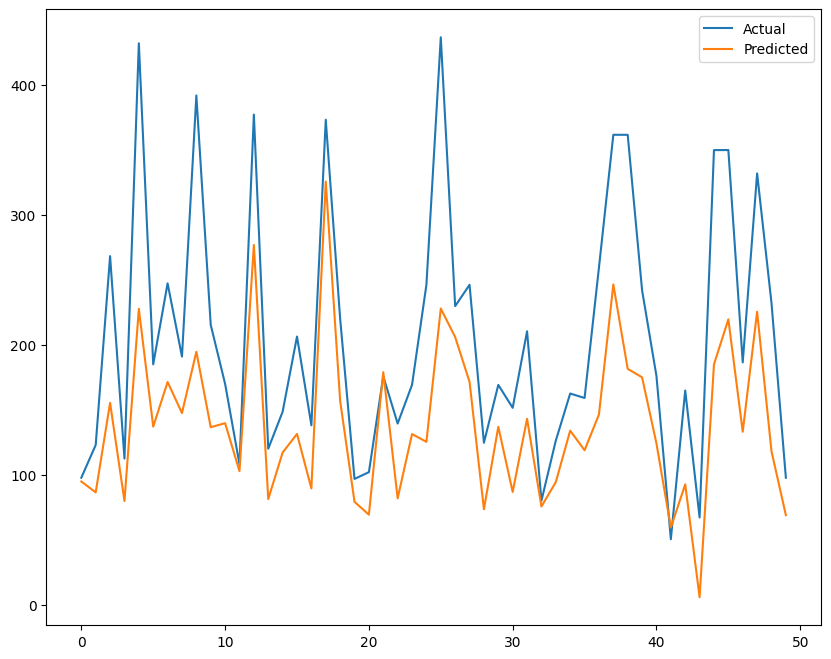

In [49]:
plt.figure(figsize=(10, 8))
Y_Test_Pred = Y_Test_Pred
plt.plot(Y_Test_Pred[:50])
plt.legend(["Actual", "Predicted"])

In [50]:
#4. Linear Regression Model Evalutaion
from sklearn.metrics import r2_score
reg_score = r2_score(Y_Test , Y_Pred)
reg_score

0.3173585332794544

In [53]:
# we will train data first using sklearn logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(encoded_features_train, encoded_targets_train['Loan_Status'])
logistic_reg.score(encoded_features_train, encoded_targets_train['Loan_Status'])

0.8097560975609757

In [54]:
logistic_reg.score(encoded_features_test, encoded_targets_test['Loan_Status']) #R^2 Score

0.8058252427184466

In [88]:
from LogisticRegression import LogisticRegression # our model from scratch version
theta_X = np.zeros(encoded_features_train.shape[1])
itmes_number = encoded_features_train.size/2.0
model = LogisticRegression(encoded_features_train,encoded_targets_train['Loan_Status'] , 0 ,theta_X , 0.01,itmes_number)
result = pd.Series(model.predict())
result.unique()
result.unique()

array([1])